<a href="https://colab.research.google.com/github/darpan02-cypher/Knowledge-Data-and-Discovery/blob/main/lstm_hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


# 1️⃣ Load the datasets

In [ ]:

train_data = pd.read_csv("/content/drive/MyDrive/KDD/hw9-RNN/Google_Stock_Price_Train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/KDD/hw9-RNN/Google_Stock_Price_Test.csv")

In [ ]:
# Use only the 'Close' column and convert to numeric, handling commas
training_set = train_data['Close'].astype(str).str.replace(',', '', regex=True).astype(float).values.reshape(-1, 1)
test_set = test_data['Close'].astype(str).str.replace(',', '', regex=True).astype(float).values.reshape(-1, 1)

# 2️⃣ Scale the data (normalization)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_scaled = scaler.fit_transform(training_set)

# 3️⃣ Create data structure with 45 time-steps and 1 output


In [ ]:
X_train, y_train = [], []
for i in range(45, len(training_scaled)):
    X_train.append(training_scaled[i-45:i, 0])
    y_train.append(training_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 4️⃣ Build the LSTM model


In [ ]:
model = Sequential()

model.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))

model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=30))
model.add(Dropout(0.1))

model.add(Dense(units=1))  # Prediction of next closing price

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 5️⃣ Compile and train


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0734
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0115
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0053
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0072
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0069
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0060
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0053
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0055
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0031
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0039
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0044
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0048
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - lo

# 6️⃣ Prepare the test data


In [ ]:
dataset_total = pd.concat((train_data['Close'], test_data['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 45:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(45, 45 + len(test_data)):
    X_test.append(inputs[i-45:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 7️⃣ Predict

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


# 8️⃣ Compare Predicted vs Real Prices

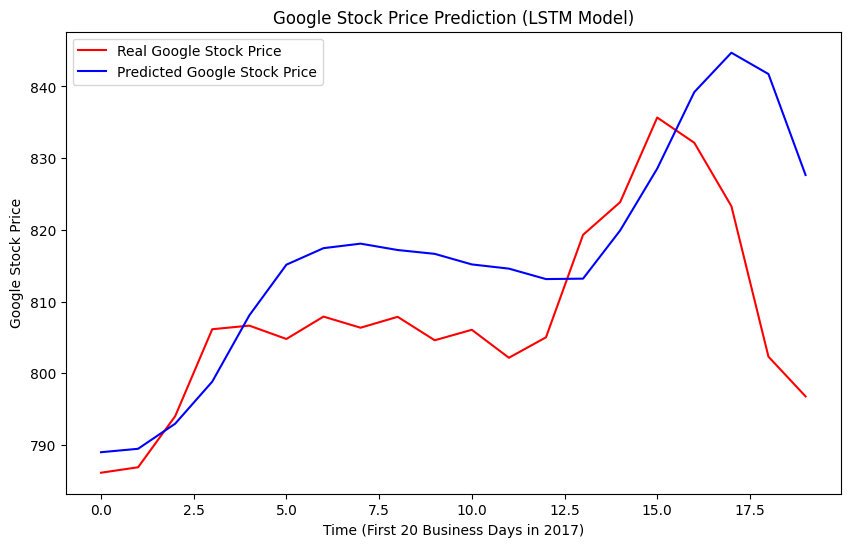

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test_set, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (LSTM Model)')
plt.xlabel('Time (First 20 Business Days in 2017)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# 9️⃣ Print out the predicted 20 prices

In [ ]:
print("Predicted Google Stock Prices (First 20 Days of 2017):")
print(predicted_stock_price.flatten())

Predicted Google Stock Prices (First 20 Days of 2017):
[788.99976 789.4777  792.9756  798.8425  808.0831  815.1514  817.4528
 818.08344 817.1949  816.6596  815.18665 814.6     813.1419  813.2029
 819.9221  828.55145 839.2199  844.7068  841.7351  827.6569 ]
